# Applied Machine Learning
## Assignment 1 Part B


Submitted By: Robin Manchanda (100811316)

## Data Description

Each predicted keypoint is specified by an (x,y) real-valued pair in the space of pixel indices. There are 15 keypoints, which represent the following elements of the face:

left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Left and right here refers to the point of view of the subject.

In some examples, some of the target keypoint positions are misssing (encoded as missing entries in the csv, i.e., with nothing between two commas).

The input image is given in the last field of the data files, and consists of a list of pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

Data link: https://www.kaggle.com/c/facial-keypoints-detection/data?select=test.zip

Note: If you dont want to train the model again, a pretrained model h5 file is also provided.

## Import Libraries

In [1]:
import numpy as np   # to work with linear algebra
import pandas as pd   #to work with dataframes
import matplotlib.pyplot as plt # to plot figures
import seaborn as sns   # to plot figures
import cv2   # to read images into arrays
from zipfile import ZipFile   # to work with zip files
from sklearn.model_selection import train_test_split # to split the dataset
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten   # to build CNN model
from tensorflow.keras.models import Sequential   # to build CNN model
from tensorflow.keras.losses import MeanSquaredError   # used as a loss function

## Reading Data

In [2]:
DATA_PATH = r'C:\Users\14372\Desktop\College-2\ML'   # Data path

In [3]:
def zip_reader(path):
    """ This function will extract zipfile """
    
    with ZipFile(path + '\\Facial_keyponts15.zip', mode = 'r') as f:
        print('Extracting Data...')
        f.extractall(path + '\\Facial_keyponts15')   # Extract zip file.
        print('Extraction Completed.')

In [4]:
zip_reader(DATA_PATH)

Extracting Data...
Extraction Completed.


In [5]:
df_kp = pd.read_csv(DATA_PATH + '\\Facial_keyponts15\\training.csv')   #reading csv file 
df_kp.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


## Handling Null values

In [6]:
df_kp.info()   # to get info about null values in all columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_kp.isnull(), cbar = False) # heatmap to show null in each column
plt.title('Plot shows the null values for each columnm')

As you can see that there are a lot of null values, we use 'ffill' method to fill na, it will fill values exact as in the previous instance

In [8]:
df_kp.fillna(method= 'ffill', inplace= True)   # filling null values

<AxesSubplot:>

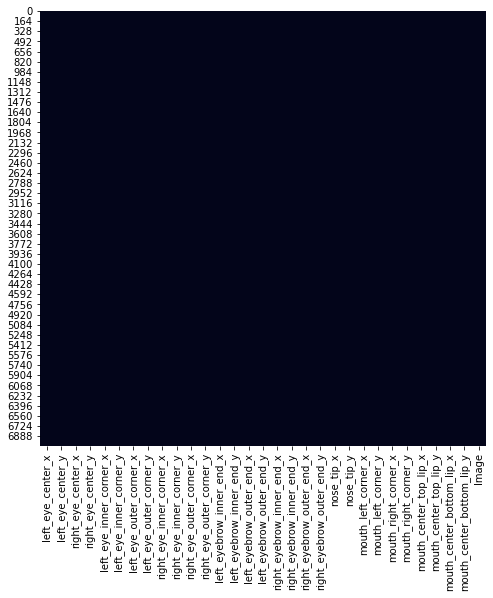

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df_kp.isnull(), cbar = False)

## Preprocessing

In [10]:
def pre_processing(df):
    """ This function will output an array of shape (m, 96, 96, 1)
    Input: Dataframe
    """
    df['Image'] = df['Image'].apply(
        lambda x: np.array(x.split()).astype('float').reshape(96, 96) 
    ) # to convert string to array of float of shape (96, 96)
    
    x_processed = np.expand_dims(
        np.array(df['Image'].tolist()), axis = -1
    ) / 255.0 # Exapanding dimension at last axis and normalizing the pixel values.
    
    return x_processed

In [11]:
x = pre_processing(df_kp)
y = df_kp.iloc[:, :-1].to_numpy()  # converting into numpy array
print(x.shape, y.shape)

(7049, 96, 96, 1) (7049, 30)


In [12]:
kp_x = [i for i in range(30) if i % 2 == 0]   # to select columns with even index
kp_y = [i for i in range(30) if i % 2 != 0]   # to select columns with odd index

def image_plot(img_arr, y_arr, nrows = 2, ncols = 2):
    """ This function is used to plot the images with their landmarks/ keypoints"""
    
    n = 0
    m = img_arr.shape[0]  # total number of instances
    rand_list = np.random.choice(
        m,nrows*ncols)   # to sample a list of random number of size = nrows*ncols from m. 
    
    fig, ax = plt.subplots(
        nrows,ncols,sharex=True,sharey=True,figsize=[8, 8]
    )   # to create nrows*ncols subplots 
    
    for row in range(nrows):   #Looping through the rows
        for col in range(ncols):   #Looping through the columns
            img = np.squeeze(img_arr[rand_list[n]]) * 255.0   # to nullify the affect of normalization
            ax[row,col].imshow(img, cmap = 'gray')   # to plot actual image
            
            y_x = y_arr[rand_list[n]][kp_x].ravel()   # select x cordinates
            y_y = y_arr[rand_list[n]][kp_y].ravel()   # select y cordinates
            ax[row,col].scatter(x = y_x, y = y_y, c = 'r', s= 10)    # to plot landmarks
            ax[row,col].set_xticks(())
            ax[row,col].set_yticks(())
            ax[row,col].set_title('image index = %d' %(rand_list[n]),fontsize=10)
            n += 1

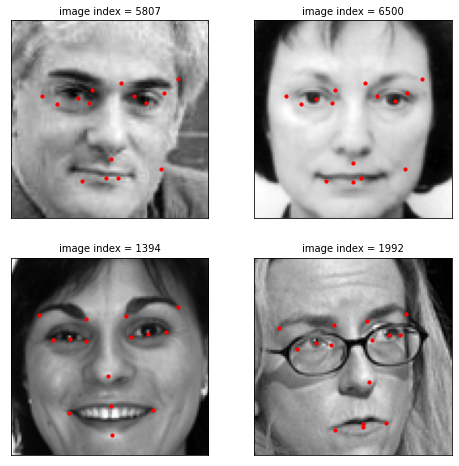

In [13]:
image_plot(x, y)

## Splitting the dataset into train and validation data

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

## Building CNN model

In [15]:
model = Sequential()   # sequential model

model.add(
    Conv2D(32, (3,3), padding = 'same' ,activation = 'relu', input_shape = (96, 96, 1))
)# Adding a convolution layer with filter = 32, kernel size = (3,3), padding =same, activation=relu, and input shape = (96,96,1) 
model.add(
    Conv2D(64, (3,3), padding = 'same', activation = 'relu')
)# Adding a convolution layer with filter = 64, kernel size = (3,3), padding =same, activation=relu, and input shape = (96,96,1)
model.add(MaxPooling2D())# Adding a maxpooling layer of kernel size = (2,2)

model.add(Conv2D(128, (3,3), activation = 'relu')
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D())# Adding a maxpooling layer of kernel size = (2,2)

model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPooling2D())# Adding a maxpooling layer of kernel size = (2,2)

model.add(Flatten())   # Flatten layer to flattening the output
model.add(Dense(512, activation = 'relu'))   # Dense layer with 512 neurons

model.add(Dense(256, activation = 'relu'))   # Dense layer with 256 neurons

model.add(Dense(30, activation = 'linear'))  # Output layer with neurons same as output shape.

In [16]:
model.summary()   # to show model architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 256)       2

## Compiling the model

The output of the model is x, y cordinates, hence it is a regression model. We will use the mean squared error / L2 loss as a loss function as our motive is to made the predicted cordinates as close as possible to actual cordinates.

In [17]:
model.compile(
    optimizer='adam',
    loss =  'mean_squared_error',   # compiling the model with loss = mean squared error
    metrics= ['mae'])   

## Training the model

To train the model following values are used:
1. #expochs = 500
2. batch size = 64

In [18]:
history = model.fit(x_train, y_train, epochs= 500, batch_size = 64, validation_data=(x_val, y_val))

Epoch 1/500
89/89 [==============================] - 12s 83ms/step - loss: 559.9840 - mae: 15.2931 - val_loss: 10.1081 - val_mae: 1.9975
Epoch 2/500
89/89 [==============================] - 6s 67ms/step - loss: 10.7180 - mae: 2.1617 - val_loss: 10.6942 - val_mae: 2.1606
Epoch 3/500
89/89 [==============================] - 6s 67ms/step - loss: 10.8595 - mae: 2.1486 - val_loss: 18.2008 - val_mae: 3.4488
Epoch 4/500
89/89 [==============================] - 6s 67ms/step - loss: 12.1237 - mae: 2.3958 - val_loss: 9.9765 - val_mae: 1.9700
Epoch 5/500
89/89 [==============================] - 6s 67ms/step - loss: 10.3071 - mae: 2.0153 - val_loss: 12.3556 - val_mae: 2.3602.4428 - ETA: 1s - loss: - ETA: 0s - loss: 10.3345 -
Epoch 6/500
89/89 [==============================] - 6s 67ms/step - loss: 10.2234 - mae: 2.1123 - val_loss: 9.3398 - val_mae: 1.8847
Epoch 7/500
89/89 [==============================] - 6s 67ms/step - loss: 10.3625 - mae: 2.1257 - val_loss: 9.7910 - val_mae: 2.0030
Epoch 8/500

89/89 [==============================] - 6s 66ms/step - loss: 5.7603 - mae: 1.4963 - val_loss: 6.1815 - val_mae: 1.6312
Epoch 96/500
89/89 [==============================] - 6s 66ms/step - loss: 4.9052 - mae: 1.4201 - val_loss: 7.3223 - val_mae: 1.8991
Epoch 97/500
89/89 [==============================] - 6s 67ms/step - loss: 4.1098 - mae: 1.3640 - val_loss: 5.1078 - val_mae: 1.3867s - loss: 4.5175 - ma - ETA: 3s - ETA: 1s - 
Epoch 98/500
89/89 [==============================] - 6s 66ms/step - loss: 3.1396 - mae: 1.1773 - val_loss: 4.8554 - val_mae: 1.3205
Epoch 99/500
89/89 [==============================] - 6s 66ms/step - loss: 2.9455 - mae: 1.1220 - val_loss: 4.6625 - val_mae: 1.25293s - loss: 2.9313 - m - ETA: 2s - loss: 2.9528 - mae: 1.126 - ETA: 2s - loss:  - ETA: 1s - loss:
Epoch 100/500
89/89 [==============================] - 6s 67ms/step - loss: 2.5507 - mae: 1.0431 - val_loss: 4.2505 - val_mae: 1.1642
Epoch 101/500
89/89 [==============================] - 6s 66ms/step - loss

89/89 [==============================] - 6s 66ms/step - loss: 0.3948 - mae: 0.4051 - val_loss: 4.0479 - val_mae: 1.0784: 0.3923 - mae: 0
Epoch 205/500
89/89 [==============================] - 6s 66ms/step - loss: 0.2841 - mae: 0.3412 - val_loss: 4.0948 - val_mae: 1.1010
Epoch 206/500
89/89 [==============================] - 6s 66ms/step - loss: 0.5307 - mae: 0.4486 - val_loss: 3.9765 - val_mae: 1.0679
Epoch 207/500
89/89 [==============================] - 6s 67ms/step - loss: 0.4061 - mae: 0.3780 - val_loss: 4.1185 - val_mae: 1.1229
Epoch 208/500
89/89 [==============================] - 6s 66ms/step - loss: 0.2547 - mae: 0.3480 - val_loss: 4.2397 - val_mae: 1.1581
Epoch 209/500
89/89 [==============================] - 6s 66ms/step - loss: 0.5591 - mae: 0.4496 - val_loss: 4.0321 - val_mae: 1.0899
Epoch 210/500
89/89 [==============================] - 6s 67ms/step - loss: 0.4372 - mae: 0.4005 - val_loss: 3.9639 - val_mae: 1.0507- ETA: 1s 
Epoch 211/500
89/89 [============================

Epoch 321/500
89/89 [==============================] - 6s 66ms/step - loss: 0.2889 - mae: 0.3093 - val_loss: 3.8798 - val_mae: 1.0763
Epoch 322/500
89/89 [==============================] - 6s 66ms/step - loss: 0.3826 - mae: 0.3448 - val_loss: 3.8007 - val_mae: 1.0442
Epoch 323/500
89/89 [==============================] - 6s 66ms/step - loss: 0.3157 - mae: 0.3273 - val_loss: 3.8462 - val_mae: 1.04850
Epoch 324/500
89/89 [==============================] - 6s 66ms/step - loss: 0.2049 - mae: 0.2655 - val_loss: 3.8710 - val_mae: 1.0847 
Epoch 325/500
89/89 [==============================] - 6s 66ms/step - loss: 0.2781 - mae: 0.3306 - val_loss: 3.7921 - val_mae: 1.0368 - ETA: 1s - l
Epoch 326/500
89/89 [==============================] - 6s 66ms/step - loss: 0.4385 - mae: 0.4071 - val_loss: 4.2055 - val_mae: 1.1902
Epoch 327/500
89/89 [==============================] - 6s 66ms/step - loss: 0.3060 - mae: 0.3561 - val_loss: 3.8537 - val_mae: 1.0467
Epoch 328/500
89/89 [=========================

Epoch 377/500
89/89 [==============================] - 6s 66ms/step - loss: 0.3396 - mae: 0.3581 - val_loss: 3.7958 - val_mae: 1.0374
Epoch 378/500
89/89 [==============================] - 6s 67ms/step - loss: 0.2632 - mae: 0.2868 - val_loss: 3.8764 - val_mae: 1.0788loss: 0.1432 - m - ETA: 3s - loss: 0.1698 - - ETA: 3s - loss: 0.2246 - mae: 0. - ETA: 2s - ETA: 0s - loss: 0.2628 - mae: 0 - ETA: 0s - loss: 0.2628 - mae: 0.288 - ETA: 0s - loss: 0.2628 - mae: 0.2 - ETA: 0s - loss: 0.2624 - mae:
Epoch 379/500
89/89 [==============================] - 6s 67ms/step - loss: 0.3722 - mae: 0.3211 - val_loss: 3.7608 - val_mae: 1.0256ss: 0.3753 - mae: 0.32
Epoch 380/500
89/89 [==============================] - 6s 66ms/step - loss: 0.2148 - mae: 0.2770 - val_loss: 3.8339 - val_mae: 1.0349- loss:  - ETA: 2s - loss: 0.14 - ETA: 1s - 
Epoch 381/500
89/89 [==============================] - 6s 66ms/step - loss: 0.1897 - mae: 0.2622 - val_loss: 4.0212 - val_mae: 1.1108
Epoch 382/500
89/89 [===============

89/89 [==============================] - 6s 67ms/step - loss: 0.2482 - mae: 0.2544 - val_loss: 3.6947 - val_mae: 1.0042ETA: 0s - loss: 0.2499 - mae:
Epoch 488/500
89/89 [==============================] - 6s 66ms/step - loss: 0.2260 - mae: 0.2331 - val_loss: 3.7167 - val_mae: 1.0046 - loss: 0.2026 - mae: 0.22 - ETA: 4s -  - ETA: 2s - loss: 0.2094 - mae:  - ETA:  - ETA: 0s - loss: 0.2244 - mae: 0.23 - ETA: 0s - loss: 0.2250 - mae: 0
Epoch 489/500
89/89 [==============================] - 6s 66ms/step - loss: 0.1505 - mae: 0.2110 - val_loss: 3.7104 - val_mae: 1.0246loss: 0.1377 - mae:  - ETA: 3s - loss: 0.1401 - mae: 0.21 - ETA: 3s - loss: 0.1404 - mae:  - ETA: 2s - loss:  - ETA: 1s - loss: 0.1380 - mae: 0.2 - ETA: 1s - loss: 0.1373 - mae: 0.210 - ETA: 1s - los
Epoch 490/500
89/89 [==============================] - 6s 66ms/step - loss: 0.1710 - mae: 0.2273 - val_loss: 3.7478 - val_mae: 1.0140
Epoch 491/500
89/89 [==============================] - 6s 66ms/step - loss: 0.3216 - mae: 0.2528 -

## Saving the model

In [20]:
model.save('facial_keypoints15.h5')

## Plot the loss and metrics of the model

In [21]:
def get_history(metric, title, ylabel):
    """ This function is used to plot the history (loss and metrics) with respect to epochs"""
    
    plt.plot(history.history[metric])   # to plot metrics for training data
    plt.plot(history.history['val_' + metric])   # to plot metrics for validataion data
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('epochs')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

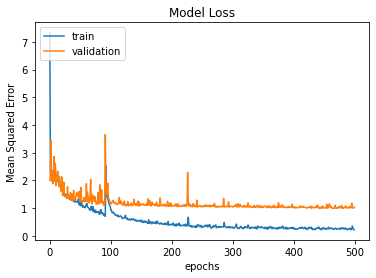

In [22]:
get_history('mae', 'Model Loss', 'Mean Squared Error')   # to plot loss

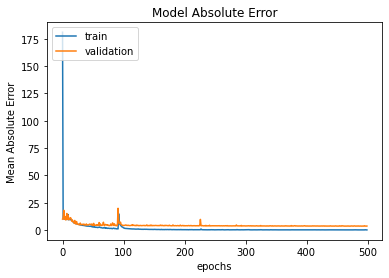

In [23]:
get_history('loss', 'Model Absolute Error', 'Mean Absolute Error')   # to plot metrics used

## Prediction

In [24]:
df_test =  pd.read_csv(DATA_PATH + '\\Facial_keyponts15\\test.csv')
df_test.head(2)   # test dataframe

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...


In [25]:
x_test = pre_processing(df_test)   # preprocessing the test images

In [26]:
y_pred = model.predict(x_test)   # predicting the output for test images
y_pred.shape

(1783, 30)

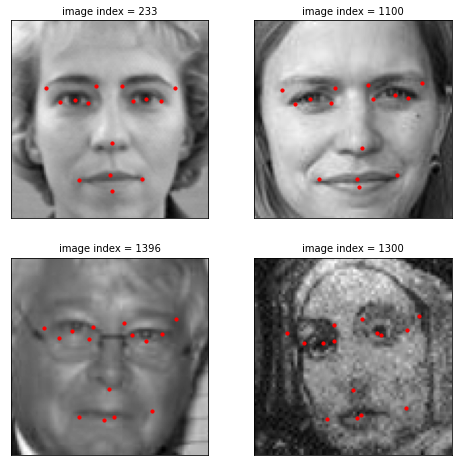

In [27]:
image_plot(x_test, y_pred)   # to plot test images and their respective predicted landmarks.

## Recommendations
1. As we have seen in the plots of loss and metrics that there validation losses are higher than the training loss, which is a sign of overfitting. Hence, dropout layer, and regularization can be used to overcome this problem.
2. After changing the model as said in first recommendation, then the model can be trained for more epochs to get better result

## Conclusions
1. CNN, which is usually used for classification, can be used to predict the facial keypoints.
2. Here CNN works as a regression model, hence in the last layer linear activation is used, and to predict cordinates as close as actual, we have used mean squared error loss function.
3. Model can do even better if the missing values are lesser.

## References
1. The data that has been used in this file is acquired from Kaggle competitions, data link: https://www.kaggle.com/c/facial-keypoints-detection/data?select=test.zip.